# CIFAR10 DATA CLASSIFICATION USING CNN

# Introduction

CIFAR-10 🖼️

CIFAR-10 is a well-known dataset in the realm of computer vision and deep learning. It stands for "Canadian Institute For Advanced Research - 10," and it's often considered a benchmark dataset for image classification tasks. This dataset consists of 60,000 32x32 color images, categorized into ten different classes.

In [40]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical



In [41]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to be between 0 and 1
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encode labels

In [42]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

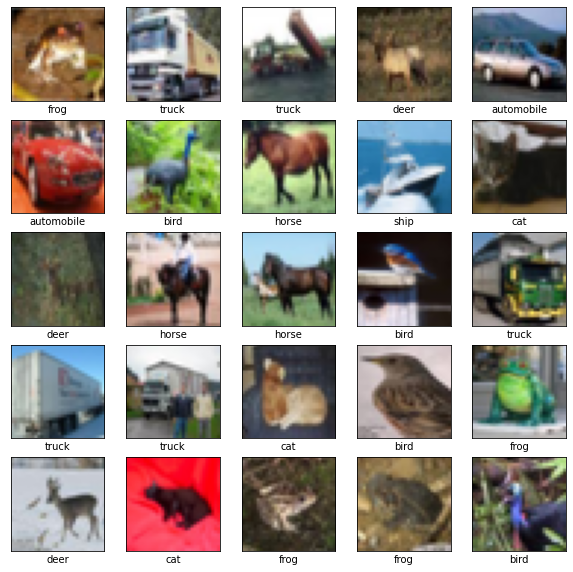

In [45]:
# Define a function to plot CIFAR-10 images
def plot_cifar_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[np.argmax(labels[i])])
    plt.show()

# Plot CIFAR-10 images
plot_cifar_images(x_train, y_train)

In [46]:
# Define the CNN model
model = keras.Sequential()

# Add a 2D convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max-pooling layer with a 2x2 pool size
model.add(layers.MaxPooling2D((2, 2)))

# Add another 2D convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a third 2D convolutional layer with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the previous layers
model.add(layers.Flatten())

# Add a fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (for 10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))


In [49]:
#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.5860 - accuracy: 0.7938 - val_loss: 0.8949 - val_accuracy: 0.7021
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5569 - accuracy: 0.8046 - val_loss: 0.9344 - val_accuracy: 0.7048
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5214 - accuracy: 0.8163 - val_loss: 0.8957 - val_accuracy: 0.7136
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4943 - accuracy: 0.8238 - val_loss: 0.9621 - val_accuracy: 0.7066
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4641 - accuracy: 0.8356 - val_loss: 0.9223 - val_accuracy: 0.7155
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4392 - accuracy: 0.8430 - val_loss: 1.0455 - val_accuracy: 0.6952
Epoch 7/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.4167 - accuracy: 0.8521 - val_loss: 1.0327 -

In [55]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 1.1001 - accuracy: 0.7098
Test accuracy: 0.7098000049591064


In [ ]:
# Save the model for future use
#model.save('cifar_cnn_model.h5')

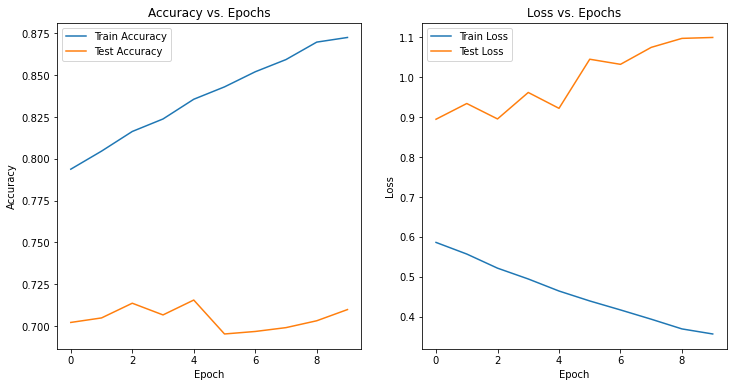

In [59]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy curves
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()

plt.show()


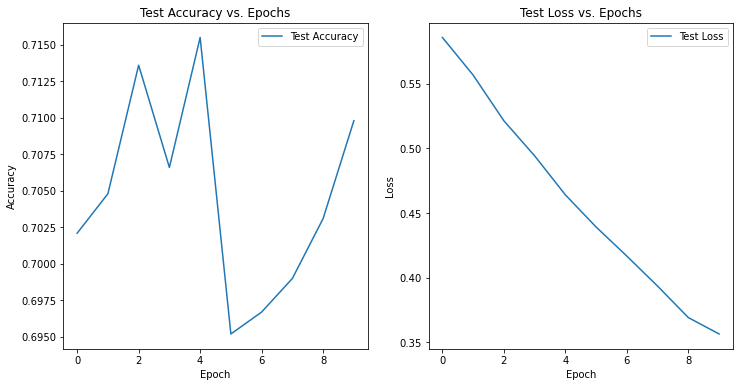

In [61]:
import matplotlib.pyplot as plt

# Plot test accuracy and loss curves
plt.figure(figsize=(12, 6))

# Plot test accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs. Epochs')
plt.legend()

# Plot test loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Test Loss vs. Epochs')
plt.legend()

plt.show()


In [62]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 4ms/step


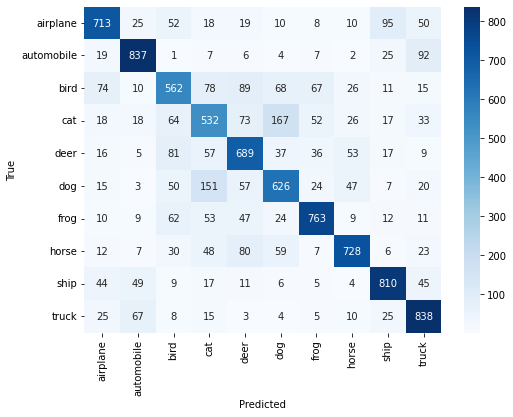

In [63]:
# Plot a confusion matrix heatmap
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

    airplane       0.75      0.71      0.73      1000
  automobile       0.81      0.84      0.82      1000
        bird       0.61      0.56      0.59      1000
         cat       0.55      0.53      0.54      1000
        deer       0.64      0.69      0.66      1000
         dog       0.62      0.63      0.62      1000
        frog       0.78      0.76      0.77      1000
       horse       0.80      0.73      0.76      1000
        ship       0.79      0.81      0.80      1000
       truck       0.74      0.84      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



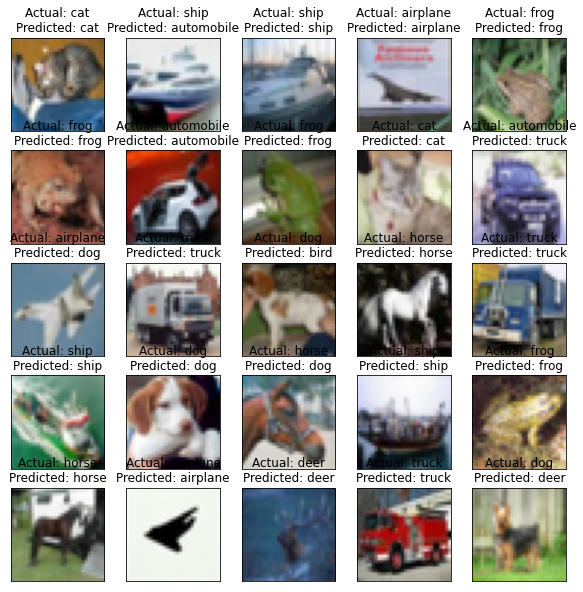

In [64]:
# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Plot some images with predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    actual_label = class_names[y_true[i]]
    predicted_label = class_names[y_pred_classes[i]]
    title = f'Actual: {actual_label}\nPredicted: {predicted_label}'
    plt.title(title)
plt.show()

In our previous Notebook we had used MLP for classsifying cifar10 and the accuracy is also very less  but these time for classification of the cifar10 data set, we used CNN.After performing classification, we can see that our model did  perform well, with an accuracy of 70%.So, after predicting and plotting 25 images, only 19 were correctly predicted. As a result, we can conclude thatCNN is suitable for extracting features from images and classifying them. we can say that CNN (convolutional neural networks), which work well for grid-like structures for capturing image features. 